# Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Problem Statement

You have been given a dataset that includes all the medical condition of a patient. You have to build a classifier that can predict how likely a patient can get a heart stroke.

# Importing the dataset

Link: https://drive.google.com/file/d/1uqi87nveAWf1sQ6bTaedVBEGidwre1Pf/view

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ShapeAI DST 11021 Oct-Jan Batch 2021-22/Datasets/healthcare-dataset-stroke-data.csv')

# EDA - Exploratory Data Analysis

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [ ]:
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [ ]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<Axes: >

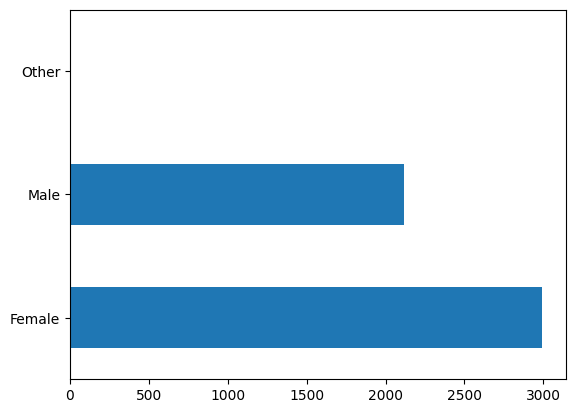

In [ ]:
df.gender.value_counts().plot(kind='barh')

In [ ]:
df.gender.replace('Other', 'Female', inplace=True)

In [ ]:
df.gender.value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

In [ ]:
le = LabelEncoder()

In [ ]:
df.gender = le.fit_transform(df.gender)

In [ ]:
df.gender.value_counts()

0    2995
1    2115
Name: gender, dtype: int64

* F -> 0
* M -> 1

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.age.describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [ ]:
Days
0.8

In [ ]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
df[df.age == df.age.min()].work_type

1614    children
3295    children
Name: work_type, dtype: object

In [ ]:
df.iloc[3295]

gender                      1
age                      0.08
hypertension                0
heart_disease               0
ever_married               No
work_type            children
Residence_type          Rural
avg_glucose_level       70.33
bmi                      16.9
smoking_status        Unknown
stroke                      0
Name: 3295, dtype: object

In [ ]:
import math

In [ ]:
math.ceil(0.08)

1

In [ ]:
math.floor(0.08)

0

In [ ]:
for i in range(len(df)):
  df.age[i] = math.ceil(df.age[i])

<ipython-input-32-5549c5060554>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.age[i] = math.ceil(df.age[i])


In [ ]:
df.age.describe()

count    5110.000000
mean       43.237769
std        22.591958
min         1.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [ ]:
df.age = df.age.astype('int')

In [ ]:
df.age.describe()

count    5110.000000
mean       43.237769
std        22.591958
min         1.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [ ]:
df.dtypes

gender                 int64
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [ ]:
df.hypertension.value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [ ]:
4612/5110

0.9025440313111546

In [ ]:
df.heart_disease.value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [ ]:
4834/5110

0.9459882583170255

In [ ]:
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [ ]:
df.ever_married = le.fit_transform(df.ever_married)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,0,61,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,1,80,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,0,49,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,0,79,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
# Working - Private, Self-employed, Govt_job
# No-working - Never_worked, children

In [ ]:
df.work_type.replace(['Private', 'Self-employed', 'Govt_job', 'Never_worked', 'children'],
                     ['Working','Working','Working','Not_Working','Not_Working'],
                     inplace=True)

In [ ]:
df.work_type.value_counts()

Working        4401
Not_Working     709
Name: work_type, dtype: int64

In [ ]:
df.work_type = le.fit_transform(df.work_type)

In [ ]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
df.smoking_status.replace(['never smoked', 'formerly smoked'],
                          ['never_smoked', 'formerly_smoked'],
                          inplace=True)

In [ ]:
df.smoking_status.value_counts()

never_smoked       1892
Unknown            1544
formerly_smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
df[df.work_type == 'children'].smoking_status

162     Unknown
245     Unknown
249     Unknown
282     Unknown
290     Unknown
         ...   
5089    Unknown
5094    Unknown
5095    Unknown
5098    Unknown
5104    Unknown
Name: smoking_status, Length: 687, dtype: object

In [ ]:
newdf = df.copy()

In [ ]:
for i in range(len(df)):
  if df.work_type[i] == 'children':
    df.smoking_status[i] = 'never_smoked'

<ipython-input-65-642150ddcb6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.smoking_status[i] = 'never_smoked'


In [ ]:
df[df.work_type == 'children'].smoking_status

162     never_smoked
245     never_smoked
249     never_smoked
282     never_smoked
290     never_smoked
            ...     
5089    never_smoked
5094    never_smoked
5095    never_smoked
5098    never_smoked
5104    never_smoked
Name: smoking_status, Length: 687, dtype: object

In [ ]:
df.smoking_status.value_counts()

never_smoked       2525
Unknown             926
formerly_smoked     872
smokes              787
Name: smoking_status, dtype: int64

In [ ]:
never_smoked
formerly_smoked
smokes
Unknown

In [ ]:
newdf[newdf.work_type == 'children'].smoking_status.replace(['Unknown'], ['never_smoked'], inplace=True)

<ipython-input-71-6db99b9787fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf[newdf.work_type == 'children'].smoking_status.replace(['Unknown'], ['never_smoked'], inplace=True)


In [ ]:
newdf.smoking_status.value_counts()

never_smoked       1892
Unknown            1544
formerly_smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
ohe = OneHotEncoder(sparse_output=False)

In [ ]:
newcol = ohe.fit_transform(df[['smoking_status']])

In [ ]:
newcol

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,Private,Urban,228.69,36.6,formerly_smoked,1
1,0,61,0,0,1,Self-employed,Rural,202.21,NaN,never_smoked,1
2,1,80,0,1,1,Private,Rural,105.92,32.5,never_smoked,1
3,0,49,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,0,79,1,0,1,Self-employed,Rural,174.12,24.0,never_smoked,1


In [ ]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,0,80,1,0,1,Private,Urban,83.75,NaN,never_smoked,0
5106,0,81,0,0,1,Self-employed,Urban,125.20,40.0,never_smoked,0
5107,0,35,0,0,1,Self-employed,Rural,82.99,30.6,never_smoked,0
5108,1,51,0,0,1,Private,Rural,166.29,25.6,formerly_smoked,0
5109,0,44,0,0,1,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
'Unknown', 'formerly_smoked', 'never_smoked', 'smokes'

In [ ]:
df[['Unknown', 'formerly_smoked', 'never_smoked', 'smokes']] = newcol

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Unknown,formerly_smoked,never_smoked,smokes
0,1,67,0,1,1,Private,Urban,228.69,36.6,formerly_smoked,1,0.0,1.0,0.0,0.0
1,0,61,0,0,1,Self-employed,Rural,202.21,NaN,never_smoked,1,0.0,0.0,1.0,0.0
2,1,80,0,1,1,Private,Rural,105.92,32.5,never_smoked,1,0.0,0.0,1.0,0.0
3,0,49,0,0,1,Private,Urban,171.23,34.4,smokes,1,0.0,0.0,0.0,1.0
4,0,79,1,0,1,Self-employed,Rural,174.12,24.0,never_smoked,1,0.0,0.0,1.0,0.0


In [ ]:
df.drop(['smoking_status', 'Unknown'], axis=1, inplace=True)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,formerly_smoked,never_smoked,smokes
0,1,67,0,1,1,1,Urban,228.69,36.6,1,1.0,0.0,0.0
1,0,61,0,0,1,1,Rural,202.21,NaN,1,0.0,1.0,0.0
2,1,80,0,1,1,1,Rural,105.92,32.5,1,0.0,1.0,0.0
3,0,49,0,0,1,1,Urban,171.23,34.4,1,0.0,0.0,1.0
4,0,79,1,0,1,1,Rural,174.12,24.0,1,0.0,1.0,0.0


In [ ]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [ ]:
df.Residence_type = le.fit_transform(df.Residence_type)

In [ ]:
df.bmi.isnull().sum()

201

In [ ]:
df.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
df.bmi.mean()

28.893236911794666

In [ ]:
df.bmi.median()

28.1

In [ ]:
df.bmi.mode()

0    28.7
Name: bmi, dtype: float64

In [ ]:
df.bmi.fillna(df.bmi.median(), inplace=True)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,formerly_smoked,never_smoked,smokes
0,1,67,0,1,1,1,1,228.69,36.6,1,1.0,0.0,0.0
1,0,61,0,0,1,1,0,202.21,28.1,1,0.0,1.0,0.0
2,1,80,0,1,1,1,0,105.92,32.5,1,0.0,1.0,0.0
3,0,49,0,0,1,1,1,171.23,34.4,1,0.0,0.0,1.0
4,0,79,1,0,1,1,0,174.12,24.0,1,0.0,1.0,0.0


In [ ]:
df.formerly_smoked = df.formerly_smoked.astype('int')
df.never_smoked = df.never_smoked.astype('int')
df.smokes = df.smokes.astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   stroke             5110 non-null   int64  
 10  formerly_smoked    5110 non-null   int64  
 11  never_smoked       5110 non-null   int64  
 12  smokes             5110 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 519.1 KB


In [ ]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,formerly_smoked,never_smoked,smokes
gender,1.000000,-0.027577,0.021275,0.085717,-0.029936,-0.090284,-0.005937,0.054580,-0.026310,0.009117,0.041279,-0.038212,0.011299
age,-0.027577,1.000000,0.276488,0.263919,0.679065,0.640110,0.014205,0.238259,0.323941,0.245398,0.247701,-0.288573,0.074613
hypertension,0.021275,0.276488,1.000000,0.108306,0.164243,0.131892,-0.007913,0.174474,0.158293,0.127904,0.061421,-0.018578,0.031629
heart_disease,0.085717,0.263919,0.108306,1.000000,0.114644,0.093402,0.003092,0.161857,0.036916,0.134914,0.068813,-0.078580,0.044354
ever_married,-0.029936,0.679065,0.164243,0.114644,1.000000,0.554470,0.006261,0.155068,0.334911,0.108340,0.181605,-0.242944,0.106834
work_type,-0.090284,0.640110,0.131892,0.093402,0.554470,1.000000,-0.002051,0.103682,0.441641,0.085583,0.182064,-0.397055,0.171255
Residence_type,-0.005937,0.014205,-0.007913,0.003092,0.006261,-0.002051,1.000000,-0.004946,-0.000277,0.015458,0.006247,-0.024865,0.027312
avg_glucose_level,0.054580,0.238259,0.174474,0.161857,0.155068,0.103682,-0.004946,1.000000,0.166876,0.131945,0.071255,-0.045628,0.016967
bmi,-0.026310,0.323941,0.158293,0.036916,0.334911,0.441641,-0.000277,0.166876,1.000000,0.036110,0.111210,-0.183396,0.085312
stroke,0.009117,0.245398,0.127904,0.134914,0.108340,0.085583,0.015458,0.131945,0.036110,1.000000,0.066466,-0.056428,0.009194


<Axes: >

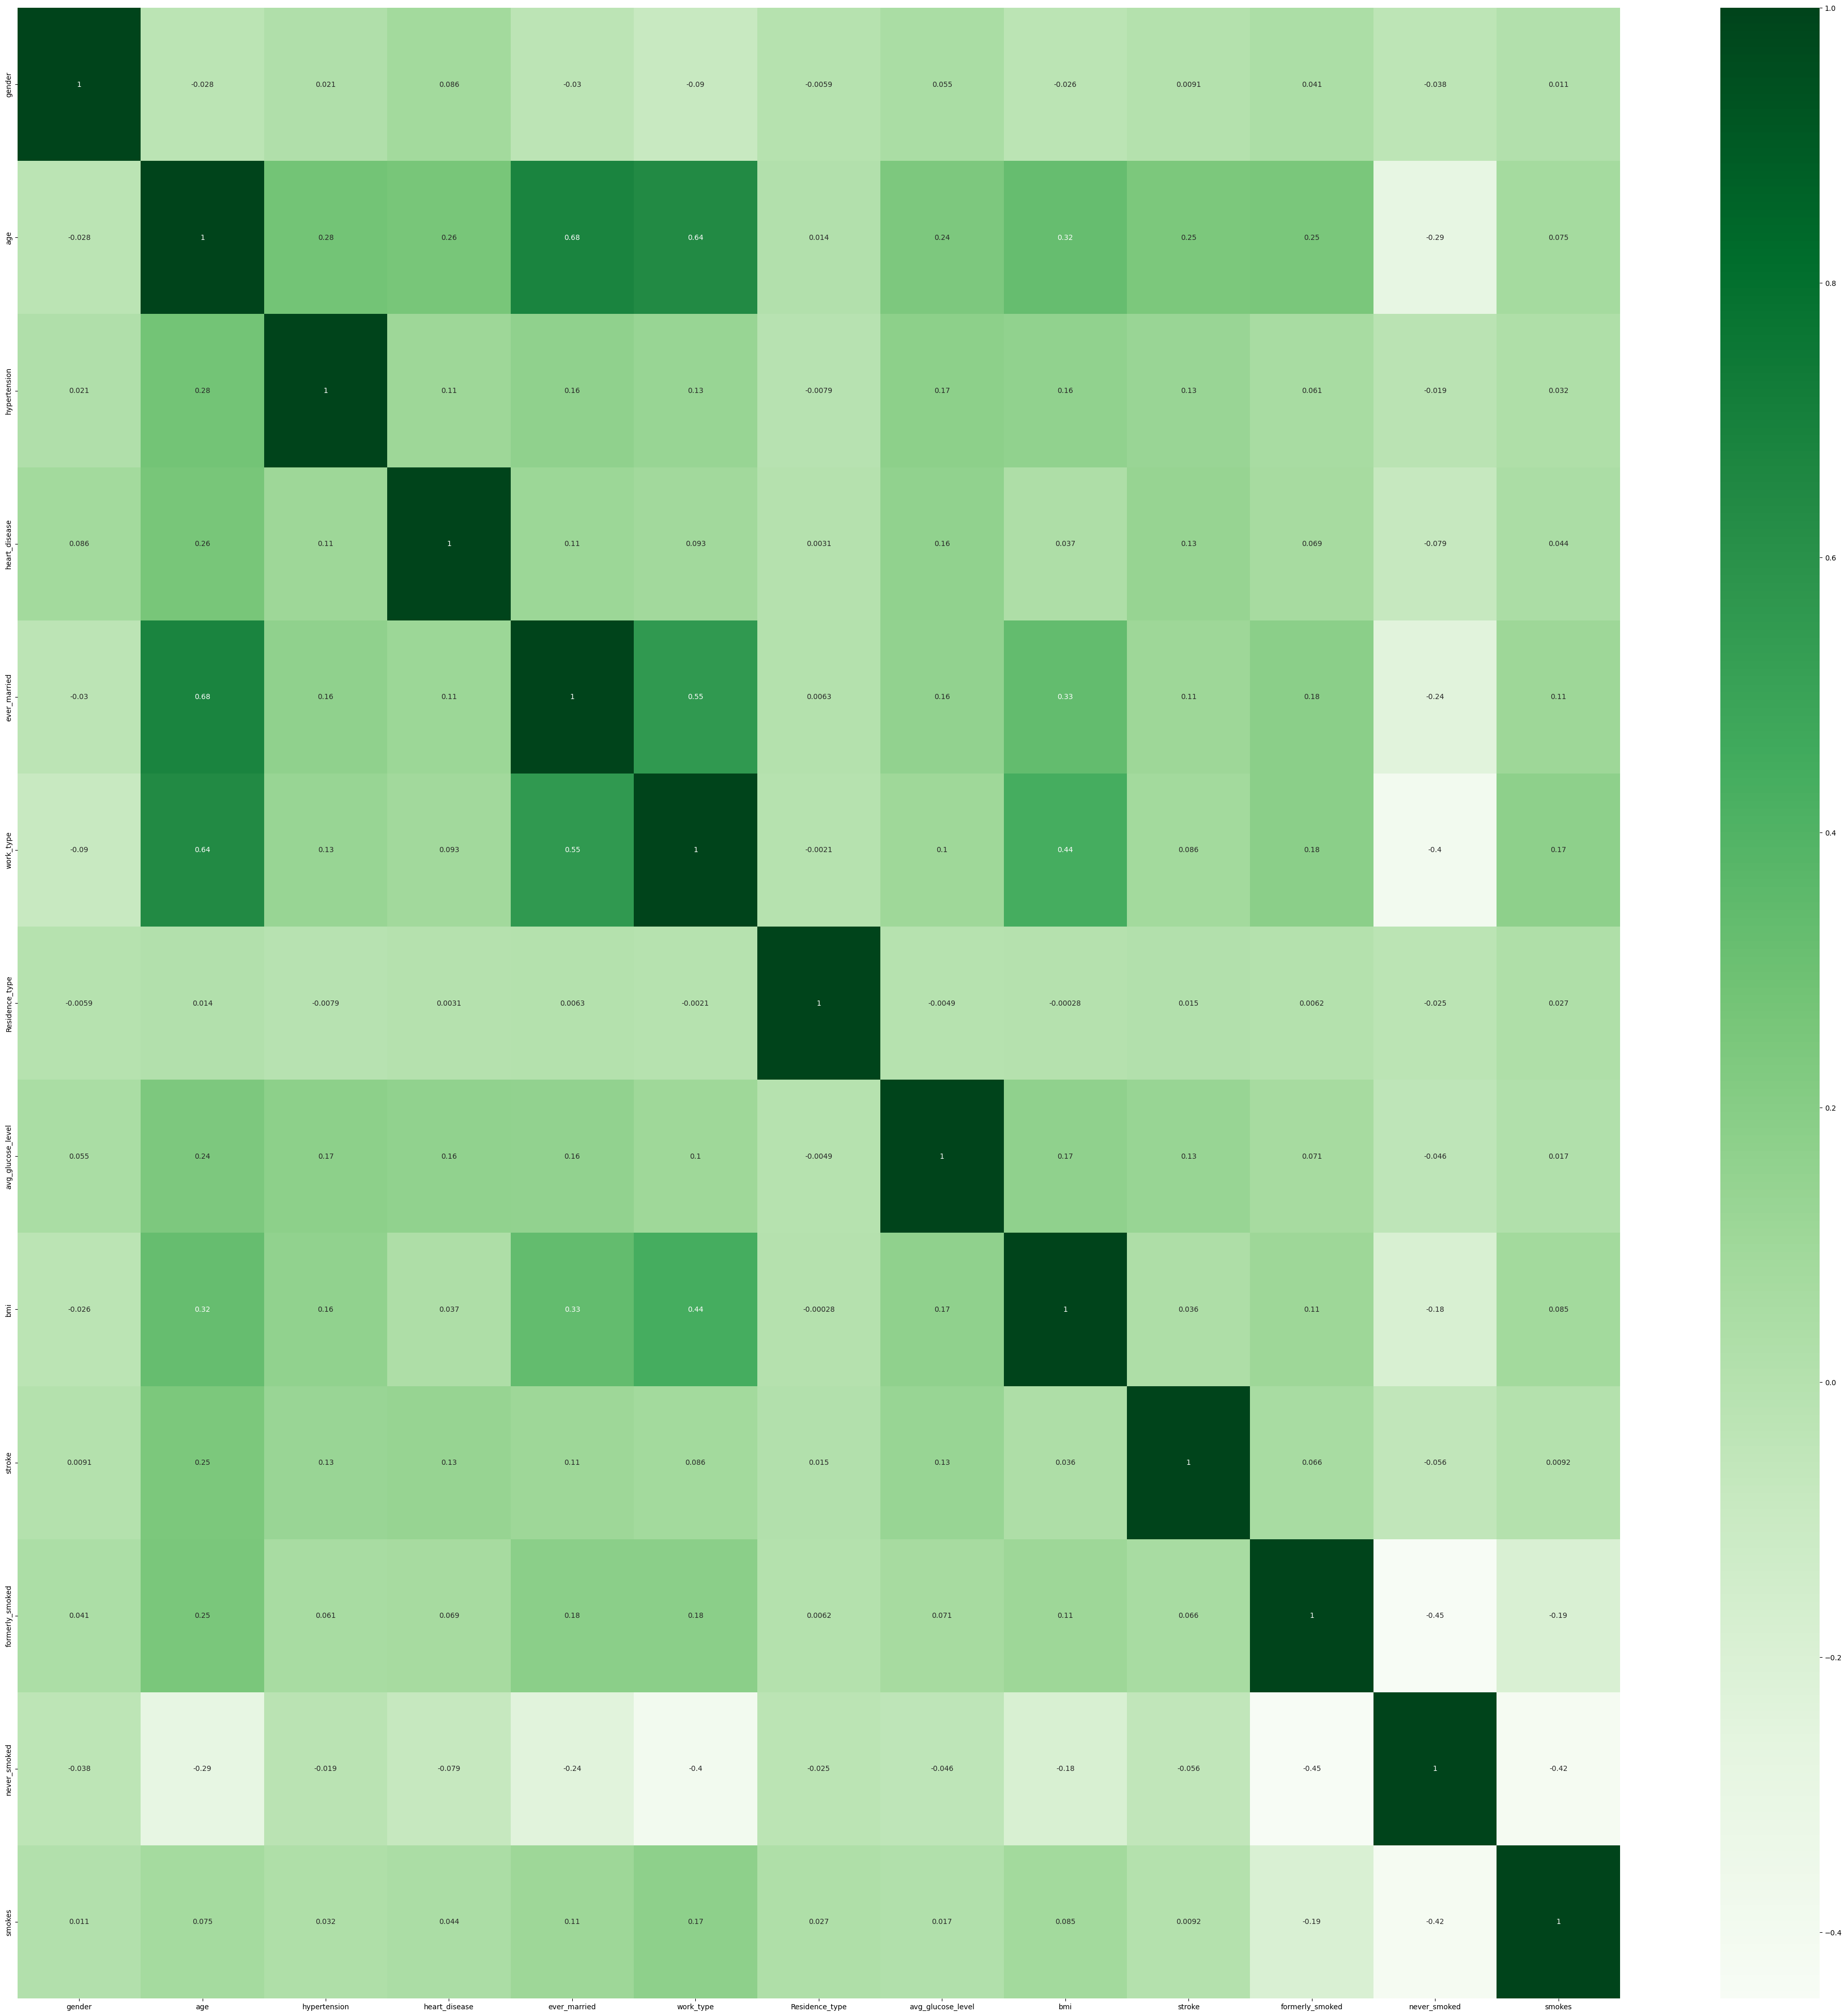

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

# Model Selection

In [ ]:
lrc = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

# Splitting the dataset

In [ ]:
X = df.drop('stroke', axis=1)
y = df.stroke

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Training the model

In [ ]:
lrc.fit(X_train, y_train)
svc.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

# Testing the model

In [ ]:
lrc_y_pred = lrc.predict(X_test)
svc_y_pred = svc.predict(X_test)
dtc_y_pred = dtc.predict(X_test)
rfc_y_pred = rfc.predict(X_test)

In [ ]:
final  = pd.DataFrame({
    'Actual': y_test,
    'LR': lrc_y_pred,
    'SVC': svc_y_pred,
    'DTC': dtc_y_pred,
    'RFC': rfc_y_pred
})

In [ ]:
final.head(10)

,Actual,LR,SVC,DTC,RFC
4688,0,0,0,0,0
4478,0,0,0,0,0
3849,0,0,0,0,0
4355,0,0,0,1,0
3826,0,0,0,0,0
3951,0,0,0,1,0
3396,0,0,0,0,0
465,0,0,0,0,0
410,0,0,0,0,0
1632,0,0,0,0,0


# Performance Checking - Confusion Matrix

In [ ]:
confusion_matrix(y_test, lrc_y_pred)

array([[960,   0],
       [ 62,   0]])

In [ ]:
960 / (960 + 62)

0.9393346379647749

In [ ]:
print(f'LRC -> {accuracy_score(y_test, lrc_y_pred)}')
print(f'SVC -> {accuracy_score(y_test, svc_y_pred)}')
print(f'DTC -> {accuracy_score(y_test, dtc_y_pred)}')
print(f'RFC -> {accuracy_score(y_test, rfc_y_pred)}')

LRC -> 0.9393346379647749
SVC -> 0.9393346379647749
DTC -> 0.9148727984344422
RFC -> 0.9383561643835616
